In [1]:
from IPython.display import display, Image
from pprint import pprint
import gv

from ginv import *
sympy.init_printing()

In [2]:
var = 'a, b, c, d, e'.split(', ')
Poly.init(var)

([[[1 0 0 0 0], 1]],
 [[[0 1 0 0 0], 1]],
 [[[0 0 1 0 0], 1]],
 [[[0 0 0 1 0], 1]],
 [[[0 0 0 0 1], 1]])

In [3]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
Poly.init(var, fun)

(([[[1 0 0 0 0], 1]],
  [[[0 1 0 0 0], 1]],
  [[[0 0 1 0 0], 1]],
  [[[0 0 0 1 0], 1]],
  [[[0 0 0 0 1], 1]]),
 ([[[0;0 0 0 0 0], 1]], [[[1;0 0 0 0 0], 1]], [[[2;0 0 0 0 0], 1]]))

In [4]:
Monom.cmp = Monom.POTlex # POTlex, TOPlex, POTdeglex, TOPdeglex

In [5]:
var = 'a, b, c, d, e'.split(', ')
a, b, c, d, e = Poly.init(var)
3*a**1*b**2*c**3*d**4*e**5 + (2*a**5*b**2 + 13)*e**3 + 5

[[[5 2 0 0 3], 2], [[1 2 3 4 5], 3], [[0 0 0 0 3], 13], [[0 0 0 0 0], 5]]

In [6]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
var, fun = Poly.init(var, fun)
a, b, c, d, e = var
u, v, w = fun
p = 3*a**1*b**2*c**3*d**4*e**5 + (2*u*a**5*b**2 + 13)*e**3 + 5 + w
print(f"{p} \n-> {p!r}")
print(f"{Poly()} -> {Poly()!r}") 

u*a**5*b**2*e**3*2 + w + a*b**2*c**3*d**4*e**5*3 + e**3*13 + 5 
-> [[[0;5 2 0 0 3], 2], [[2;0 0 0 0 0], 1], [[1 2 3 4 5], 3], [[0 0 0 0 3], 13], [[0 0 0 0 0], 5]]
0 -> []


In [7]:
Monom.cmp = Monom.TOPlex
p = 3*a**1*b**2*c**3*d**4*e**5 + (2*u*a**5*b**2 + 13)*e**3 + 5 + w
print(f"{p} \n-> {p!r}")
print(f"{Poly()} -> {Poly()!r}") 

u*a**5*b**2*e**3*2 + a*b**2*c**3*d**4*e**5*3 + e**3*13 + w + 5 
-> [[[0;5 2 0 0 3], 2], [[1 2 3 4 5], 3], [[0 0 0 0 3], 13], [[2;0 0 0 0 0], 1], [[0 0 0 0 0], 5]]
0 -> []


In [8]:
Monom.cmp = Monom.TOPdeglex
p = 3*a**1*b**2*c**3*d**4*e**5 + (2*u*a**5*b**2 + 13)*e**3 + 5 + w
print(f"{p} \n-> {p!r}")
print(f"{Poly()} -> {Poly()!r}") 

a*b**2*c**3*d**4*e**5*3 + u*a**5*b**2*e**3*2 + e**3*13 + w + 5 
-> [[[1 2 3 4 5], 3], [[0;5 2 0 0 3], 2], [[0 0 0 0 3], 13], [[2;0 0 0 0 0], 1], [[0 0 0 0 0], 5]]
0 -> []


In [9]:
Monom.cmp = Monom.POTdeglex
p = 3*a**1*b**2*c**3*d**4*e**5 + (2*u*a**5*b**2 + 13)*e**3 + 5 + w
print(f"{p} \n-> {p!r}")
print(f"{Poly()} -> {Poly()!r}") 

u*a**5*b**2*e**3*2 + w + a*b**2*c**3*d**4*e**5*3 + e**3*13 + 5 
-> [[[0;5 2 0 0 3], 2], [[2;0 0 0 0 0], 1], [[1 2 3 4 5], 3], [[0 0 0 0 3], 13], [[0 0 0 0 0], 5]]
0 -> []


In [10]:
par = sympy.symbols('alpha, beta, tau, delta, epsilon, zeta', real=True)
par

In [11]:
p = Poly(par[2]**4*21546/par[3])
print(f"{p} -> {p!r}")

21546*tau**4/delta -> [[[0 0 0 0 0], 21546*tau**4/delta]]


In [12]:
p.cancel()
print(f"{p} -> {p!r}")

21546*tau**4 -> [[[0 0 0 0 0], 21546*tau**4]]


In [13]:
h = u*c**5 + a**2*b*par[2]*1236537 + d*par[0]
print(f"{h} \n-> {h!r}")

u*c**5 + a**2*b*1236537*tau + d*alpha 
-> [[[0;0 0 5 0 0], 1], [[2 1 0 0 0], 1236537*tau], [[0 0 0 1 0], alpha]]


In [14]:
g = Poly(h)
print(g != h)
print(g == h)
print(g > h)

False
True
False


In [15]:
h.lm(), h.lc()

([0;0 0 5 0 0], 1)

In [16]:
p = g.prolong(4)
print(f"{p} \n-> {p!r}")

u*c**5*e + a**2*b*e*1236537*tau + d*e*alpha 
-> [[[0;0 0 5 0 1], 1], [[2 1 0 0 1], 1236537*tau], [[0 0 0 1 1], alpha]]


In [17]:
p = g.diff(par[2])
print(f"{p} \n-> {p!r}")

a**2*b*1236537 
-> [[[2 1 0 0 0], 1236537]]


In [18]:
g.reduction(0, h)
g

[]

In [19]:
%%time
h *= (4*b**4 + e*par[2] + par[1])**9
print(h)

u*b**36*c**5*262144 + u*b**32*c**5*e*589824*tau + u*b**32*c**5*589824*beta + u*b**28*c**5*e**2*589824*tau**2 + u*b**28*c**5*e*1179648*beta*tau + u*b**28*c**5*589824*beta**2 + u*b**24*c**5*e**3*344064*tau**3 + u*b**24*c**5*e**2*1032192*beta*tau**2 + u*b**24*c**5*e*1032192*beta**2*tau + u*b**24*c**5*344064*beta**3 + u*b**20*c**5*e**4*129024*tau**4 + u*b**20*c**5*e**3*516096*beta*tau**3 + u*b**20*c**5*e**2*774144*beta**2*tau**2 + u*b**20*c**5*e*516096*beta**3*tau + u*b**16*c**5*e**5*32256*tau**5 + u*b**20*c**5*129024*beta**4 + u*b**16*c**5*e**4*161280*beta*tau**4 + u*b**16*c**5*e**3*322560*beta**2*tau**3 + u*b**16*c**5*e**2*322560*beta**3*tau**2 + u*b**12*c**5*e**6*5376*tau**6 + u*b**16*c**5*e*161280*beta**4*tau + u*b**12*c**5*e**5*32256*beta*tau**5 + u*b**16*c**5*32256*beta**5 + u*b**12*c**5*e**4*80640*beta**2*tau**4 + u*b**12*c**5*e**3*107520*beta**3*tau**3 + u*b**8*c**5*e**7*576*tau**7 + u*b**12*c**5*e**2*80640*beta**4*tau**2 + u*b**8*c**5*e**6*4032*beta*tau**6 + u*b**12*c**5*e*32256*b

In [20]:
%%time
h.NFtail(4*b**4 + e*par[2] + par[1])
print(h)

u*b**36*c**5*262144 + u*c**5*e**9*tau**9 + u*c**5*e**8*9*beta*tau**8 + u*c**5*e**7*36*beta**2*tau**7 + u*c**5*e**6*84*beta**3*tau**6 + u*c**5*e**5*126*beta**4*tau**5 + u*c**5*e**4*126*beta**5*tau**4 + u*c**5*e**3*84*beta**6*tau**3 + u*c**5*e**2*36*beta**7*tau**2 + u*c**5*e*9*beta**8*tau + u*c**5*beta**9
CPU times: user 456 ms, sys: 188 µs, total: 457 ms
Wall time: 457 ms


In [21]:
%%time
h.NFhead(4*b**4 + e*par[2] + par[1])
h

CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 122 ms


[]

In [22]:
h = (4*b**4 + a*b*c**2 + e*par[2] + par[1])
h.reduce(a*b*c**2 + e*par[2])
print(h)

b**4*4 + beta


In [23]:
h = (4*b**4 + a*b*c**2 + e*par[2] + par[1])
h.reduce(a*b*c + e*par[2])
print(h)

b**4*4 + a*b*c**2 + e*tau + beta


prolong 0, Q 6
x**2*y**4
prolong 0, Q 7
x**4*y**3
prolong 6, Q 7
x**3*y**4
prolong 7, Q 7
x**5*y**2
prolong 7, Q 8
x**7*y
prolong 7, Q 0
x**6*y**2
prolong 8, Q 0
prolong 0, Q 0
HP: 3s + 10


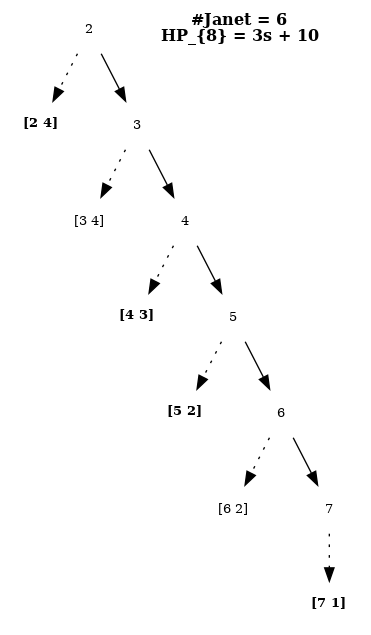

In [24]:
Monom.cmp = Monom.TOPdeglex
x, y = Poly.init('x, y'.split(', '))
mnm = Janet()
res = ginvBlockLow((x**7*y, x**5*y**2, x**4*y**3, x**2*y**4), \
mnm, level=1)
print(f"HP: {mnm.HP()}")
mnm.saveImage('mnm.png')
Image('./mnm.png')

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2
prolong 4, Q 0
x2*x4**4, x3**3*x4**2
prolong 5, Q 0
x3**2*x4**4
prolong 6, Q 0
prolong 0, Q 0
    crit1: 6
    crit2: 0
     time: 0.02 sec
    count: 7
reduction: 54
       HP: 4s + 6


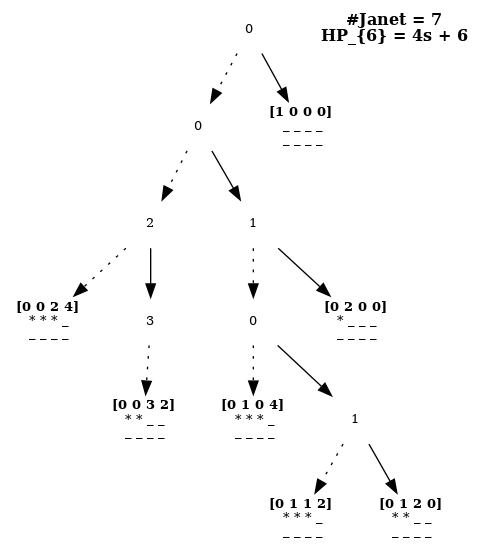

In [25]:
Monom.cmp = Monom.TOPdeglex
x1, x2, x3, x4 = Poly.init('x1, x2, x3, x4'.split(', '))
cyclic4 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1), \
cyclic4, level=1)
print(f"    crit1: {res[1]}")
print(f"    crit2: {res[2]}")
print(f"     time: {res[0]:.2f} sec")
print(f"    count: {cyclic4.count()}")
print(f"reduction: {cyclic4.reduction()}")
print(f"       HP: {cyclic4.HP()}")
cyclic4.saveImage('cyclic4.pdf', level=3)
Image('./cyclic4.png')

In [26]:
for w in cyclic4.GB():
    print(w.poly)

x3**2*x4**4 + x2*x3 + x2*x4*-1 + x3*x4 + x4**2*-2
x3**3*x4**2*-1 + x3**2*x4**3*-1 + x3 + x4
x2*x4**4*-1 + x4**5*-1 + x2 + x4
x2*x3*x4**2 + x3**2*x4**2 + x2*x4**3*-1 + x3*x4**3 + x4**4*-1 + -1
x2*x3**2*-1 + x3**2*x4*-1 + x2*x4**2 + x4**3
x2**2*-1 + x2*x4*-2 + x4**2*-1
x1 + x2 + x3 + x4


In [27]:
x1, x2, x3, x4 = sympy.symbols('x1, x2, x3, x4')
for w in cyclic4.GB():
    display(sympy.Add(*tuple(eval(f"{m}*{c}") for m, c in w.poly), evaluate=False))

prolong f*x1
f*x1
prolong f*x1*x2
f*x2**2
prolong f*x2**2*x3
f*x2*x3**2
prolong f*x2*x3**2*x4
f*x2*x3*x4**2
prolongAll
p1*x2*x3**2
prolong f*x2*x4**4
f*x2*x4**4
prolong f*x3**3*x4**2
f*x3**3*x4**2
prolongAll
p2*x2**2*x4**2
prolong f*x3**2*x4**4
f*x3**2*x4**4
prolong f*x3**2*x4**4
prolongAll
p1*x3**2*x4**4
prolongAll
prolongAll
    crit1: 6
    crit2: 0
     time: 0.05 sec
    count: 10
reduction: 68
       HP: 4s + 6


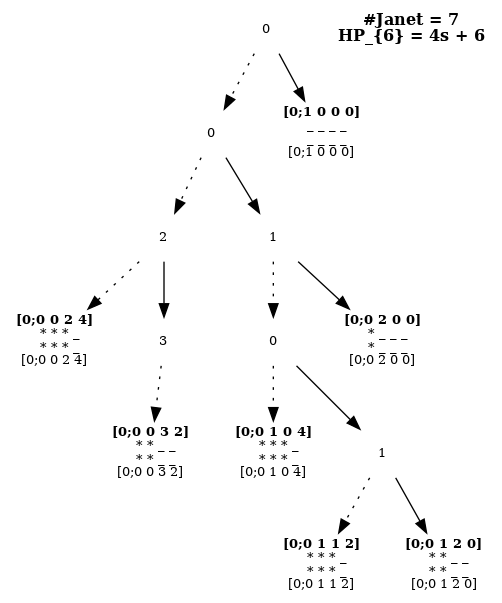

In [28]:
Monom.cmp = Monom.TOPdeglex
var = 'x1, x2, x3, x4'.split(', ')
fun = 'f, p1, p2, p3, p4'.split(', ')
var, fun = Poly.init(var, fun)
x1, x2, x3, x4 = var
f, p1, p2, p3, p4 = fun
cyclic4 = Forest(Janet)
res = ginvMin((
f*(x1+x2+x3+x4) - p1,\
f*(x1*x2+x2*x3+x3*x4+x4*x1) - p2,\
f*(x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2) - p3,\
f*(x1*x2*x3*x4-1) - p4), \
cyclic4, level=1)
print(f"    crit1: {res[1]}")
print(f"    crit2: {res[2]}")
print(f"     time: {res[0]:.2f} sec")
print(f"    count: {cyclic4.count()}")
print(f"reduction: {cyclic4.reduction()}")
print(f"       HP: {cyclic4[0].HP()}")
cyclic4[0].saveImage('cyclic4_syzygy.png', level=3)
Image('./cyclic4_syzygy.png')

In [29]:
x1, x2, x3, x4 = sympy.symbols('x1, x2, x3, x4')
f, p1, p2, p3, p4 = sympy.symbols('f, p1, p2, p3, p4')
for w in cyclic4.GB():
    display(eval(str(w.poly)).collect([f, p1, p2, p3, p4]))

In [30]:
syzygy = []
for i in range(1, 5):
    for w in cyclic4[i].GB():
        syzygy.append(tuple(sympy.Add(*tuple(eval(f"{m.lcm(fun[k].lm())}*{c}") \
           for m, c in w.poly if m.position() == k), evaluate=False) for k in range(1, 5)))
print(sympy.latex(syzygy))

\left[ \left( x_{3}^{2} x_{4}^{4} - x_{4}^{2}, \  x_{2} x_{3}^{2} x_{4}^{2} - x_{2} x_{4}^{4} - x_{3}^{2} x_{4}^{3} - x_{3} x_{4}^{4} + x_{3} + x_{4}, \  - x_{2} x_{3}^{2} x_{4} + x_{2} x_{4}^{3} + x_{4}^{4} - 1, \  x_{2} x_{3}^{2} - x_{2} x_{4}^{2} + x_{3}^{2} x_{4} - x_{4}^{3}\right), \  \left( x_{2} x_{3}^{2} + x_{3}^{2} x_{4}, \  - x_{2} x_{3} - x_{2} x_{4} - x_{3}^{2} - x_{3} x_{4}, \  x_{2} + x_{4}, \  0\right), \  \left( - x_{2} - x_{4}, \  - x_{2}^{2} x_{4}^{2} + 1, \  x_{2}^{2} x_{4} + x_{2} x_{4}^{2}, \  - x_{2}^{2} - 2 x_{2} x_{4} - x_{4}^{2}\right)\right]


In [31]:
P = (x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1)
for syz in syzygy:
    print(sum(s*p for s, p in zip(syz, P)).expand(), end=" ")

0 0 0 

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 0
x2*x4**3*x5**2, x3**3*x5**3, x3*x4**3*x5**2, x3*x4**4*x5, x3**4*x5**2, x2*x4**4*x5
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 6, Q 0
x2*x4**2*x5**4, x4**4*x5**3, x3*x4**2*x5**4, x4**3*x5**4, x2*x3*x5**5, x4**5*x5**2
prolong 7, Q 0
x3**3
prolong 3, Q 4
x2*x4**3, x3**2*x4**2
prolong 4, Q 5
x3*x4**3*x5, x3*x4**4, x4**5, x4**4*x5
prolong 5, Q 6
x2*x5**5, x2*x4**2*x5**3, x3*x4**2*x5**3
prolong 6, Q 7
x2*x4*x5**5
prolong 7, Q 7
x3*x4*x5**5, x3**2*x5**5
prolong 7, Q 8
x4**2*x5**6
prolong 8, Q 8
x3*x5**7, x4*x5**7, x5**8, x3**2*x4*x5**5
prolong 8, Q 0
x3*x4**3
prolong 4, Q 5
x4**4
prolong 4, Q 5
prolong 0, Q 0
crit1: 40
crit2: 1
 time: 0.87 sec
    count: 23
reduction: 1375
       HP: 70


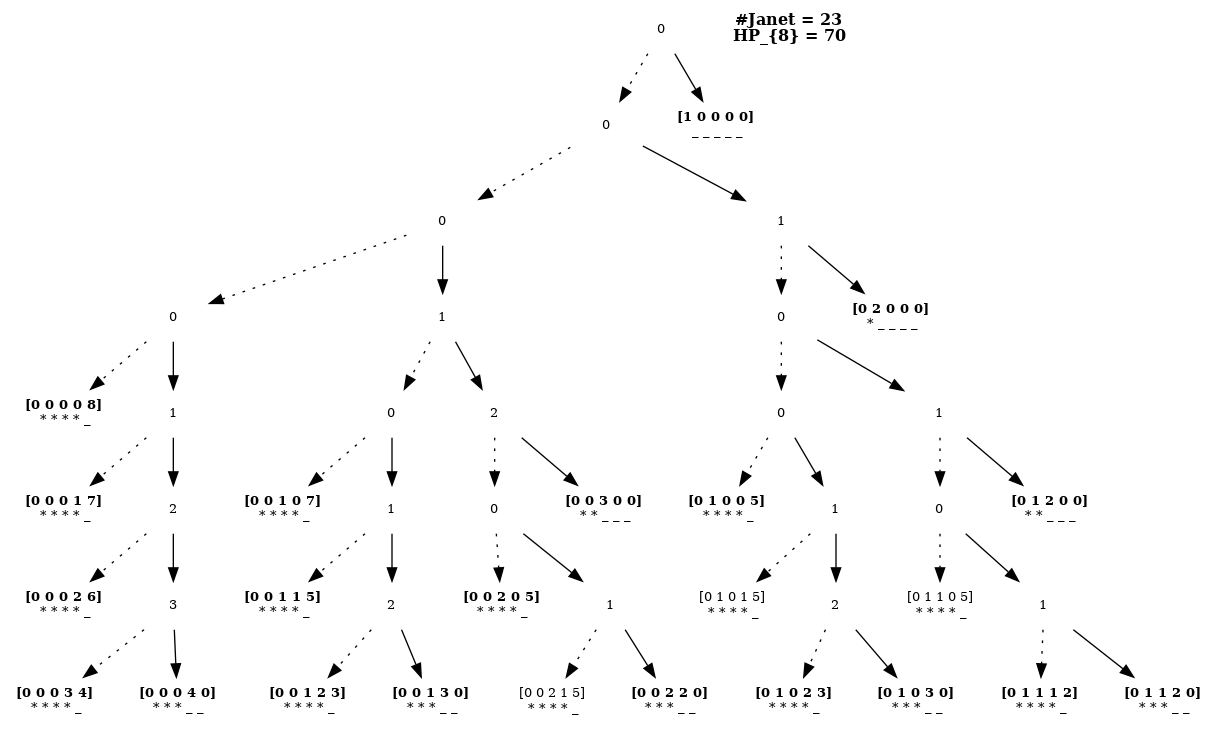

In [32]:
Monom.cmp = Monom.TOPdeglex
x1, x2, x3, x4, x5 = Poly.init('x1, x2, x3, x4, x5'.split(', '))
cyclic5 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4+x5,
x1*x2+x1*x5+x2*x3+x3*x4+x4*x5,
x1*x2*x3+x1*x2*x5+x1*x4*x5+x2*x3*x4+x3*x4*x5,
x1*x2*x3*x4+x1*x2*x3*x5+x1*x2*x4*x5+x1*x3*x4*x5+x2*x3*x4*x5,
x1*x2*x3*x4*x5-1), \
cyclic5, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic5.count()}")
print(f"reduction: {cyclic5.reduction()}")
print(f"       HP: {cyclic5.HP()}")
cyclic5.saveImage('cyclic5.pdf', level=1)
cyclic5.saveImage('cyclic5.png', level=1)
Image('./cyclic5.png')

In [33]:
x1, x2, x3, x4, x5 = sympy.symbols('x1, x2, x3, x4, x5')
for w in cyclic5.GB():
    display(sympy.Add(*tuple(eval(f"{m}*{c}") for m, c in w.poly), evaluate=False))

In [34]:
Monom.cmp = Monom.TOPdeglex
x1, x2, x3, x4, x5, x6 = Poly.init('x1, x2, x3, x4, x5, x6'.split(', '))
cyclic6 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4+x5+x6,
x1*x2+x1*x6+x2*x3+x3*x4+x4*x5+x5*x6,
x1*x2*x3+x1*x2*x6+x1*x5*x6+x2*x3*x4+x3*x4*x5+x4*x5*x6,
x1*x2*x3*x4+x1*x2*x3*x6+x1*x2*x5*x6+x1*x4*x5*x6+x2*x3*x4*x5+x3*x4*x5*x6,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x6+x1*x2*x3*x5*x6+x1*x2*x4*x5*x6+x1*x3*x4*x5*x6+x2*x3*x4*x5*x6,
x1*x2*x3*x4*x5*x6-1), \
cyclic6, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic6.count()}")
print(f"reduction: {cyclic6.reduction()}")
print(f"       HP: {cyclic6.HP()}")

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x3*x4**2*x5**3, x3*x4**3*x5**2, x3**2*x4*x5**2*x6, x3*x4**3*x5*x6, x3*x4**2*x5**2*x6, x3*x4**4*x5
prolong 6, Q 0
x3**2*x4**2*x6**3, x2*x4**2*x5**2*x6**2, x4**3*x5**2*x6**2, x2*x4*x5**3*x6**2, x3*x4*x5**4*x6, x4**3*x5**3*x6, x2*x4**2*x5**3*x6, x4**2*x5**4*x6, x2*x4*x5**4*x6, x3**4*x5*x6**2, x3**3*x5**2*x6**2, x2*x4**3*x5**2*x6, x4**4*x5**2*x6, x3*x4**4*x6**2
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 7, Q 0
x3*x4*x5**3*x6**3, x3*x4**3*x6**4, x2*x3*x5**3*x6**3, x3**2*x5**3*x6**3, x4**2*x5**3*x6**3, x2*x5**4*x6**3, x4*x5**4*x6**3, x3**3*x5*x6**4, x3**2*x4*x5*x6**4, x2*x4**3*x5*x6**3, x2*x4**2*x5*x6**4, x3*x4**2*x5*x6**4, x2*x3*x5**4*x6**2, x3**2*x5**4*x6**2
prolong 8, Q 0
x3**3, x2*x3*x4, x3**2*x4, x2*x4**2
prolong 3, Q 4
x3*x4**2*x5, x3*x4**3, x4**3*x5, x2*x3*x5**2, x3**2*x5**2, x4**4, x2*x4*x5

In [35]:
x1, x2, x3, x4, x5, x6 = sympy.symbols('x1, x2, x3, x4, x5, x6')
gb = tuple(cyclic6.GB())
for w in tuple((gb[0], gb[1], gb[-2], gb[-1])):
    display(sympy.Add(*tuple(eval(f"{m}*{c}") for m, c in w.poly), evaluate=False))

prolong x
x
prolong x**2
y**6
prolong y**9
y**4
prolong y**6
y**3*z**9
prolongAll
y**3*z**6
prolong y**3*z**9
y**3*z**4
prolong y**3*z**6
y**3*z**3
prolong y**3*z**4
y**3*z**2
prolong y**3*z**3
y**3*z
prolong y**3*z**2
y**3
prolong y**3*z
y**2*z**9
prolong y**2*z**16
y**2*z**8
prolong y**2*z**9
y**2*z**7
prolong y**2*z**8
y**2*z**6
prolong y**2*z**7
y**2*z**5
prolong y**2*z**6
y**2*z**4
prolong y**2*z**5
y**2*z**3
prolong y**2*z**4
y**2*z**2
prolong y**2*z**3
y**2*z
prolong y**2*z**2
y**2
prolong y**2*z
y*z**23
prolong y*z**44
y*z**22
prolong y*z**23
y*z**21
prolong y*z**22
y*z**20
prolong y*z**21
y*z**19
prolong y*z**20
y*z**18
prolong y*z**19
y*z**17
prolong y*z**18
y*z**16
prolong y*z**17
y*z**15
prolong y*z**16
y*z**14
prolong y*z**15
y*z**13
prolong y*z**14
y*z**12
prolong y*z**13
y*z**11
prolong y*z**12
y*z**10
prolong y*z**11
y*z**9
prolong y*z**10
y*z**8
prolong y*z**9
y*z**7
prolong y*z**8
y*z**6
prolong y*z**7
y*z**5
prolong y*z**6
y*z**4
prolong y*z**5
y*z**3
prolong y*z**4


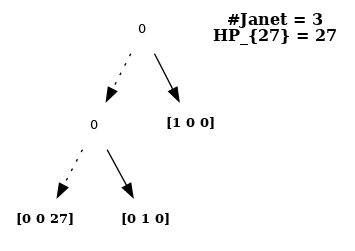

In [36]:
Monom.cmp = Monom.TOPlex
x, y, z = Poly.init('x, y, z'.split(', '))
test = Janet()
res = ginvMin((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 1,
z**3 - x**2 + y - 1), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=0)
Image('./test.png')

In [37]:
x, y, z = sympy.symbols('x, y, z')
for w in test.GB():
    display(eval(" + ".join([f"{m}*{c}" for m, c in w.poly])))

prolong 0, Q 3
z**3
prolong 0, Q 3
y**3
prolong 3, Q 3
x**3
prolong 3, Q 0
y*z**3
prolong 4, Q 4
x*z**3
prolong 4, Q 4
x*y**3
prolong 4, Q 0
y**2*z**3
prolong 5, Q 5
x*y*z**3
prolong 5, Q 5
x**2*z**3
prolong 5, Q 5
x**2*y**3
prolong 5, Q 0
x*y**2*z**3
prolong 6, Q 6
x**2*y*z**3
prolong 6, Q 6
prolong 6, Q 0
x**2*y**2*z**3
prolong 7, Q 7
prolong 7, Q 0
prolong 0, Q 0
crit1: 7
crit1: 4
 time: 0.02 sec
    count: 13
reduction: 19
       HP: 27


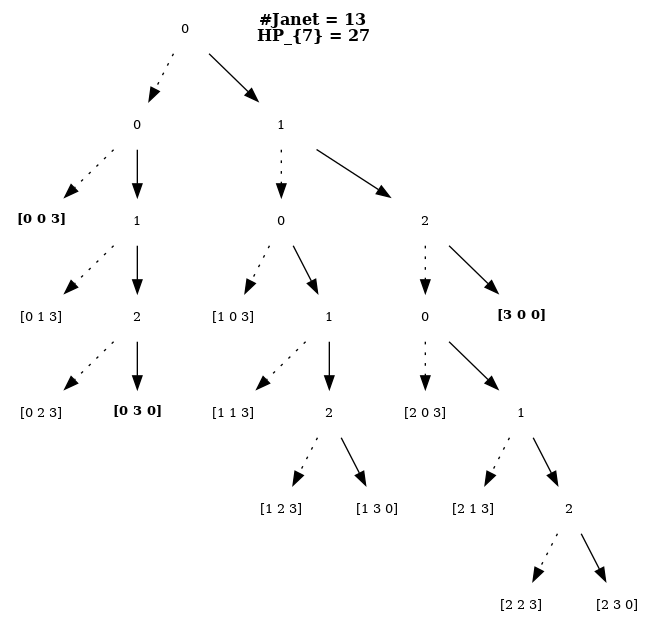

In [38]:
Monom.cmp = Monom.TOPdeglex
x, y, z = Poly.init('x, y, z'.split(', '))
test = Janet()
res = ginvBlockLow((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 1,
z**3 - x**2 + y - 1), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=0)
Image('./test.png')

In [39]:
print(sum(1 for w in test))
for w in test:
    print(f"${w.lm.latex()}$", end=", ")

13
${z}^3$, ${y} {z}^3$, ${y}^2 {z}^3$, ${y}^3$, ${x} {z}^3$, ${x} {y} {z}^3$, ${x} {y}^2 {z}^3$, ${x} {y}^3$, ${x}^2 {z}^3$, ${x}^2 {y} {z}^3$, ${x}^2 {y}^2 {z}^3$, ${x}^2 {y}^3$, ${x}^3$, 

In [40]:
rows, i = {}, 0
for d in range(8):
    for m in Monom.gradus(d):
        if not test.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0], 
[1 0 0], [0 1 0], [0 0 1], 
[2 0 0], [1 1 0], [1 0 1], [0 2 0], [0 1 1], [0 0 2], 
[2 1 0], [2 0 1], [1 2 0], [1 1 1], [1 0 2], [0 2 1], [0 1 2], 
[2 2 0], [2 1 1], [2 0 2], [1 2 1], [1 1 2], [0 2 2], 
[2 2 1], [2 1 2], [1 2 2], 
[2 2 2], 

число корней с учетом кратности: 27


In [41]:
A = [[0 for k in range(27)] for i in range(27)]
for d in range(27):
    for m, c in (x**d).NF(test):
        A[rows[m]][d] = c
b = [0 for i in range(27)]
for m, c in (x**27).NF(test):
    b[rows[m]] = c

In [42]:
A, b = sympy.Matrix(A), sympy.Matrix(b)
s = sympy.linsolve((A, b)).args[0]
p = x**27 - sum(x**d*s[d] for d in range(27))
print(p)

x**27 + x**24*-9 + x**21*29 + x**19*6 + x**18*-53 + x**17*22 + x**16*-63 + x**15*96 + x**14*-149 + x**13*242 + x**12*-261 + x**11*484 + x**10*-545 + x**9*740 + x**8*-908 + x**7*972 + x**6*-1220 + x**5*1047 + x**4*-1045 + x**3*943 + x**2*-535 + x*422 + -216


In [43]:
p.NF(test)

[]

In [44]:
x = sympy.symbols('x')
print(sympy.latex(eval(str(p))))

0


In [45]:
x = sympy.symbols('x')
sol = sympy.nroots(x**27 + x**24*-9 + x**21*29 + x**19*6 + x**18*-53 +\
    x**17*22 + x**16*-63 + x**15*96 + x**14*-149 + x**13*242 +\
    x**12*-261 + x**11*484 + x**10*-545 + x**9*740 + x**8*-908 +\
    x**7*972 + x**6*-1220 + x**5*1047 + x**4*-1045 + x**3*943 + x**2*-535 + x*422 + -216)
pprint(sol)

[1.00000000000000,
 -1.3840736015109 - 0.448471822167008*I,
 -1.3840736015109 + 0.448471822167008*I,
 -1.02879711934056 - 0.760391324933661*I,
 -1.02879711934056 + 0.760391324933661*I,
 -0.877230994069779 - 1.43314035297833*I,
 -0.877230994069779 + 1.43314035297833*I,
 -0.711407405299955 - 1.03146881471103*I,
 -0.711407405299955 + 1.03146881471103*I,
 -0.529123988373615 - 1.09253154028902*I,
 -0.529123988373615 + 1.09253154028902*I,
 -0.430386407214633 - 1.09590463831572*I,
 -0.430386407214633 + 1.09590463831572*I,
 -0.303943638658017 - 1.18064395956054*I,
 -0.303943638658017 + 1.18064395956054*I,
 -1.0*I,
 1.0*I,
 0.39699714792632 - 0.998468648595324*I,
 0.39699714792632 + 0.998468648595324*I,
 0.713156315946338 - 0.858271263074945*I,
 0.713156315946338 + 0.858271263074945*I,
 0.823238735618979 - 0.194381617248298*I,
 0.823238735618979 + 0.194381617248298*I,
 1.29963755259567 - 0.47886775883786*I,
 1.29963755259567 + 0.47886775883786*I,
 1.53193340238016 - 0.0272318188450057*I,
 1.531

In [46]:
from sympy.matrices.sparsetools import _doktocsr
from sympy import SparseMatrix

In [47]:
%%time
dct = [{}, {}, {}]
for k, v in rows.items():
    for i in range(3):
        for m, c in Poly(Monom(i)*k).NF(test):
            if c:
                dct[i][rows[m], v] = c
X, Y, Z = (SparseMatrix(27, 27, dct[i]) for i in range(3))

CPU times: user 4.88 ms, sys: 47 µs, total: 4.93 ms
Wall time: 4.85 ms


In [48]:
X*Y == Y*X and X*Z == Z*X and Z*Y == Y*Z

True

In [49]:
print(len(_doktocsr(X)[0]), 27**2, len(_doktocsr(X)[0])/27**2)

73 729 0.10013717421124829


In [50]:
X765 = sympy.Matrix([[0 for k in range(27)] for i in range(27)])
for k, v in rows.items():
    for m, c in Poly(Monom((7, 6, 5))*k).NF(test):
        X765[rows[m], v] = c
X765 == Y**5*X**7*Z**5*Y

True

In [51]:
sympy.zeros(27, 27) == X**27 + X**24*-9 + X**21*29 + X**19*6 + X**18*-53 +\
    X**17*22 + X**16*-63 + X**15*96 + X**14*-149 + X**13*242 + X**12*-261 +\
    X**11*484 + X**10*-545 + X**9*740 + X**8*-908 + X**7*972 + X**6*-1220 +\
    X**5*1047 + X**4*-1045 + X**3*943 + X**2*-535 + X*422 + sympy.eye(27)*-216

True

In [52]:
import numpy as np
from scipy import linalg

In [53]:
%%time
A = np.empty((27, 27), dtype=np.float64)
for j in range(27):
    for k in range(27):
        A[j][k] = X[j, k]
pprint(linalg.eigvals(A))

array([ 1.53193340e+00+0.02723182j,  1.53193340e+00-0.02723182j,
        1.29963755e+00+0.47886776j,  1.29963755e+00-0.47886776j,
        7.13156316e-01+0.85827126j,  7.13156316e-01-0.85827126j,
        1.00000000e+00+0.j        ,  8.23238736e-01+0.19438162j,
        8.23238736e-01-0.19438162j,  3.96997148e-01+0.99846865j,
        3.96997148e-01-0.99846865j, -1.38407360e+00+0.44847182j,
       -1.38407360e+00-0.44847182j, -8.77230994e-01+1.43314035j,
       -8.77230994e-01-1.43314035j, -1.02879712e+00+0.76039132j,
       -1.02879712e+00-0.76039132j,  5.48172618e-16+1.j        ,
        5.48172618e-16-1.j        , -7.11407405e-01+1.03146881j,
       -7.11407405e-01-1.03146881j, -3.03943639e-01+1.18064396j,
       -3.03943639e-01-1.18064396j, -5.29123988e-01+1.09253154j,
       -5.29123988e-01-1.09253154j, -4.30386407e-01+1.09590464j,
       -4.30386407e-01-1.09590464j])
CPU times: user 7.02 ms, sys: 0 ns, total: 7.02 ms
Wall time: 7.12 ms


https://link.springer.com/article/10.1007/BF01782361
<img src="Zum Hilbertschen Nullstellensatz.png">

In [54]:
Monom.cmp = Monom.POTlex
k, y, x = Poly.init('k, y, x'.split(', '))
test = Janet()
res = ginvMin((
x*(x+1)*(x-1),
y*(y+1)*(y-1),
(x - y)*k - 1,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong x**3
x**3
prolong y**3
y**3
prolong k*y
y*x**3
prolong k*y
y**2*x**3
prolong k*y
k*y
prolongAll
k*x**3
prolong k*x**3
y**2
prolong y**2*x**3
prolongAll
k*x**2
prolong k*x**3
k*x
prolong k*x**2
k
prolong k*x
prolongAll
crit1: 5
crit1: 0
 time: 0.01 sec
    count: 4
reduction: 34
       HP: 6


In [55]:
for w in test.GB():
    print(w.poly)

x**3 + x*-1
y**2*-1 + y*x*-1 + x**2*-1 + 1
k*2 + y*x**2*-3 + y*2 + x*-2


In [56]:
for w in test.GB():
    print(str(w.poly).replace('x', 'x{v}').replace('y', 'x{w}'))

x{v}**3 + x{v}*-1
x{w}**2*-1 + x{w}*x{v}*-1 + x{v}**2*-1 + 1
k*2 + x{w}*x{v}**2*-3 + x{w}*2 + x{v}*-2


In [57]:
Monom.cmp = Monom.POTlex
k, y, x = Poly.init('k, y, x'.split(', '))
test = Janet()
res = ginvMin((
x*(x+1)*(x-1)*(x+2)*(x-2),
y*(y+1)*(y-1)*(y+2)*(y-2),
(x - y)*k -1), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong x**5
x**5
prolong y**5
y**5
prolong k*y
y*x**5
prolong k*y
y**2*x**5
prolong k*y
y**3*x**5
prolong k*y
y**4*x**5
prolong k*y
k*y
prolongAll
k*x**5
prolong k*x**5
y**4
prolong y**4*x**5
prolongAll
k*x**4
prolong k*x**5
k*x**3
prolong k*x**4
k*x**2
prolong k*x**3
k*x
prolong k*x**2
k
prolong k*x
prolongAll
crit1: 7
crit1: 0
 time: 0.03 sec
    count: 6
reduction: 58
       HP: 20


In [58]:
for w in test.GB():
    print(w.poly)

x**5 + x**3*-5 + x*4
y**4 + y**3*x + y**2*x**2 + y**2*-5 + y*x**3 + y*x*-5 + x**4 + x**2*-5 + 4
k*-288 + y**3*x**4*35 + y**3*x**2*-155 + y**3*72 + y**2*x**3*40 + y**2*x*-136 + y*x**4*-115 + y*x**2*571 + y*-360 + x**3*-72 + x*360


C. Y. Chao and Z. Chen, On uniquely 3-colorable graphs, Discrete Math. 112 (1993), 21–27
![image info](./graph-nocolor.png)

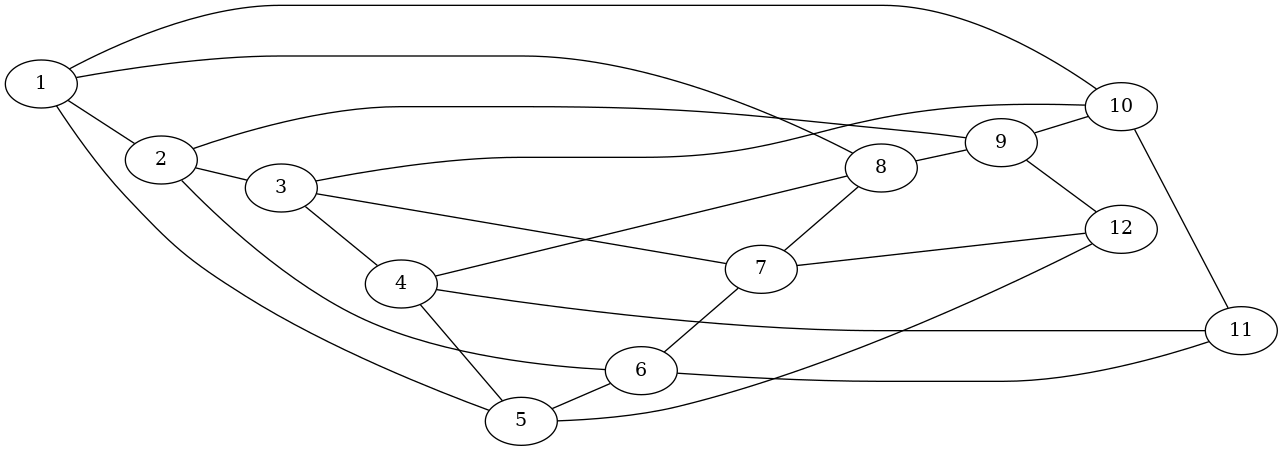

In [59]:
graph = (
(1, 2, 5, 8, 10),\
(2, 3, 6, 9),\
(3, 4, 7, 10),\
(4, 5, 8, 11),\
(5, 6, 12),\
(6, 7, 11),\
(7, 8, 12),\
(8, 9),\
(9, 10, 12),\
(10, 11),\
)

g, edge = gv.graph('grey'), {}
gv.setv(g, 'rankdir', 'LR')
# gv.setv(g, 'rankdir', 'TB')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])
gv.layout(g, 'dot')
gv.render(g, "png", 'grey.png')
Image('grey.png')

In [60]:
var = [f"x{vs}" for vs in range(1, 13)]
", ".join(var)

'x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12'

In [61]:
eqs = [f"{v}**3 + {v}*-1" for v in var]
for vs in graph:
    w = vs[0]
    for v in vs[1:]:
        eqs.append(f"x{w}**2*-1 + x{w}*x{v}*-1 + x{v}**2*-1 + 1")
eqs

['x1**3 + x1*-1',
 'x2**3 + x2*-1',
 'x3**3 + x3*-1',
 'x4**3 + x4*-1',
 'x5**3 + x5*-1',
 'x6**3 + x6*-1',
 'x7**3 + x7*-1',
 'x8**3 + x8*-1',
 'x9**3 + x9*-1',
 'x10**3 + x10*-1',
 'x11**3 + x11*-1',
 'x12**3 + x12*-1',
 'x1**2*-1 + x1*x2*-1 + x2**2*-1 + 1',
 'x1**2*-1 + x1*x5*-1 + x5**2*-1 + 1',
 'x1**2*-1 + x1*x8*-1 + x8**2*-1 + 1',
 'x1**2*-1 + x1*x10*-1 + x10**2*-1 + 1',
 'x2**2*-1 + x2*x3*-1 + x3**2*-1 + 1',
 'x2**2*-1 + x2*x6*-1 + x6**2*-1 + 1',
 'x2**2*-1 + x2*x9*-1 + x9**2*-1 + 1',
 'x3**2*-1 + x3*x4*-1 + x4**2*-1 + 1',
 'x3**2*-1 + x3*x7*-1 + x7**2*-1 + 1',
 'x3**2*-1 + x3*x10*-1 + x10**2*-1 + 1',
 'x4**2*-1 + x4*x5*-1 + x5**2*-1 + 1',
 'x4**2*-1 + x4*x8*-1 + x8**2*-1 + 1',
 'x4**2*-1 + x4*x11*-1 + x11**2*-1 + 1',
 'x5**2*-1 + x5*x6*-1 + x6**2*-1 + 1',
 'x5**2*-1 + x5*x12*-1 + x12**2*-1 + 1',
 'x6**2*-1 + x6*x7*-1 + x7**2*-1 + 1',
 'x6**2*-1 + x6*x11*-1 + x11**2*-1 + 1',
 'x7**2*-1 + x7*x8*-1 + x8**2*-1 + 1',
 'x7**2*-1 + x7*x12*-1 + x12**2*-1 + 1',
 'x8**2*-1 + x8*x9*-1 + x

In [62]:
Monom.cmp = Monom.TOPdeglex
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = Poly.init(var)
eqs = tuple(eval(eq) for eq in eqs)
test = Janet()
res = ginvBlockLow(eqs, test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong 0, Q 2
x10**2
prolong 0, Q 2
x9**2
prolong 2, Q 2
x9*x10, x8**2, x7**2, x7*x8, x6**2, x6*x7, x5**2, x5*x6, x4**2, x4*x5, x4*x8, x3**2, x3*x4, x3*x7, x2**2, x2*x3, x2*x6, x1**2, x1*x2, x1*x5, x1*x8
prolong 2, Q 3
x12**3
prolong 3, Q 3
x11**3
prolong 3, Q 3
x9*x11**2, x6*x11**2, x5*x11**2, x4*x11**2, x3*x10*x11, x1*x10*x11, x4*x9*x11, x2*x9*x11, x4*x7*x11, x8*x9*x11, x8*x10**2, x7*x10**2, x6*x10**2, x5*x10**2, x4*x10**2, x3*x10**2, x2*x10**2, x1*x10**2, x8*x9*x10, x7*x9*x10, x6*x9*x10, x5*x9*x10, x4*x9*x10, x3*x9*x10, x2*x9*x10, x1*x9*x10, x1*x7*x10, x3*x6*x10, x6*x9*x11, x1*x6*x10, x5*x10*x11, x3*x5*x10, x1*x4*x10, x7*x10*x11, x8*x9**2, x7*x9**2, x6*x9**2, x5*x9**2, x4*x9**2, x3*x9**2, x2*x9**2, x1*x9**2, x6*x8*x9, x5*x8*x9, x3*x8*x9, x2*x7*x9, x2*x5*x9, x2*x4*x9, x6*x8**2, x5*x8**2, x3*x8**2, x2*x8**2, x5*x7*x8, x2*x7*x8, x2*x4*x8, x5*x7**2, x4*x7**2, x2*x7**2, x1*x7**2, x4*x6*x7, x1*x6*x7, x1*x3*x7, x4*x6**2, x3*x6**2, x1*x6**2, x3*x5*x6, x3*x5**2, x2*x5**2, x2*x4*x5, x2*x4**2

In [63]:
for w in test.GB():
    print(w.poly)

x12**3 + x12*-1
x11*-1 + x12
x10**2*-1 + x10*x12*-1 + x12**2*-1 + 1
x9 + x10 + x12
x8*-1 + x12
x7*-1 + x10
x6 + x10 + x12
x5*-1 + x10
x4*-1 + x10*-1 + x12*-1
x3*-1 + x12
x2 + x10*-1
x1 + x10 + x12


In [64]:
eqs = [w.poly for w in test.GB()]
eqs.append(x12 - 1)
test1 = Janet()
res = ginvBlockLow(eqs, test1, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test1.HP()}")
for w in test1.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x9
prolong 1, Q 1
x8
prolong 1, Q 1
x7
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x3
prolong 1, Q 1
x2
prolong 1, Q 1
x1
prolong 1, Q 2
x10**2
prolong 1, Q 2
x10*x12
prolong 2, Q 2
x10*x11
prolong 2, Q 2
prolong 2, Q 0
prolong 0, Q 0
 time: 0.04 sec
       HP: 2
x12 + -1
x11*-1 + 1
x10**2*-1 + x10*-1
x9 + x10 + 1
x8*-1 + 1
x7*-1 + x10
x6 + x10 + 1
x5*-1 + x10
x4*-1 + x10*-1 + -1
x3*-1 + 1
x2 + x10*-1
x1 + x10 + 1


In [65]:
eqs = [w.poly for w in test1.GB()]
eqs.append(x10 + 1)
test2 = Janet()
res = ginvBlockLow(eqs, test2, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test2.HP()}")
for w in test2.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x10
prolong 1, Q 1
x9
prolong 1, Q 1
x8
prolong 1, Q 1
x7
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x3
prolong 1, Q 1
x2
prolong 1, Q 1
x1
prolong 1, Q 2
prolong 0, Q 0
 time: 0.03 sec
       HP: 1
x12 + -1
x11*-1 + 1
x10 + 1
x9
x8*-1 + 1
x7*-1 + -1
x6
x5*-1 + -1
x4
x3*-1 + 1
x2 + 1
x1


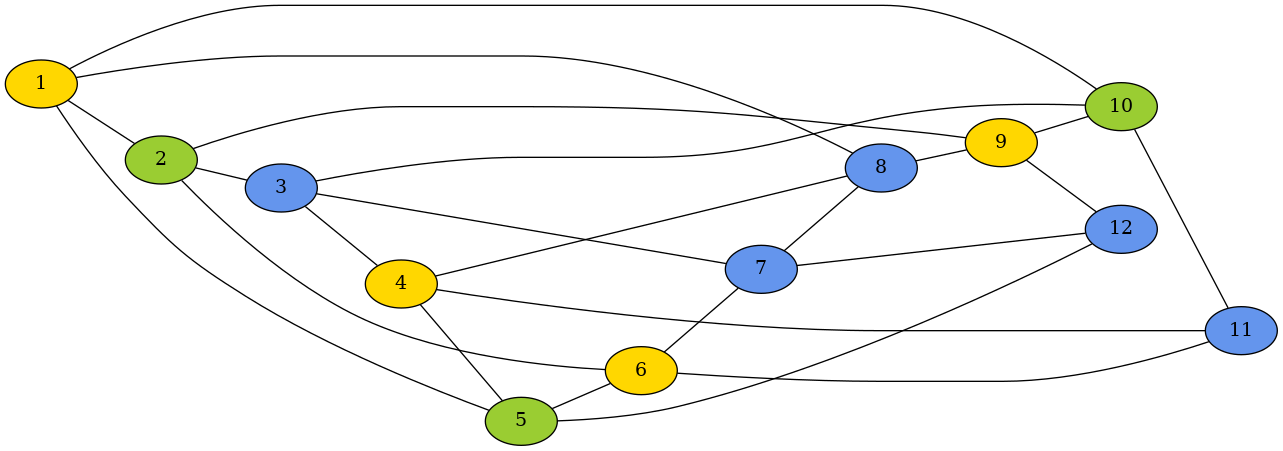

In [66]:
sol = {12: 1, 11: 1, 10: -1, 9: 0, 8: 1, 7: 1, 
      6: 0, 5: -1, 4: 0, 3: 1, 2: -1, 1: 0}
colors = {
-1: "yellowgreen",\
 0: "gold",\
 1: "cornflowerblue",\
}

g, edge = gv.graph('color'), {}
gv.setv(g, 'rankdir', 'LR')
# gv.setv(g, 'rankdir', 'TB')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[vs[0]]])
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])

for v in (11, 12):
    a = edge[v]
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[v]])

gv.layout(g, 'dot')
gv.render(g, "png", 'color.png')
Image('color.png')

Polynomial GCDs by syzygies
https://ieeexplore.ieee.org/document/7829593

In [67]:
Monom.cmp = Monom.TOPdeglex
x = Poly.init(['x'])[0]
test = Janet()
res = ginvBlockLow((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3),\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3),\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
for w in test.GB():
    print(w.poly)

prolong 0, Q 5
x**5
prolong 0, Q 5
x**4
prolong 0, Q 5
x**3
prolong 0, Q 4
x**2
prolong 0, Q 3
prolong 0, Q 0
crit1: 0
crit1: 0
 time: 0.01 sec
    count: 1
reduction: 10
       HP: 2
x**2 + x*5 + 2


In [68]:
Monom.cmp = Monom.TOPdeglex
var = ['x']
fun = 'a, b, c'.split(', ')
var, fun = Poly.init(var, fun)
x = var[0]
a, b, c = fun
test = Forest(Janet)
res = ginvMin((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3)*a + b,\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
for w in test.GB():
    print(w.poly)

prolong a*x**5
a*x**5
prolong a*x**5
a*x**4
prolong a*x**5
a*x**3
prolong a*x**4
a*x**2
prolong a*x**3
b*x**3
prolongAll
crit1: 0
crit1: 0
 time: 0.03 sec
    count: 2
reduction: 10
       HP: s + 6
a*x**2*59 + b*x**2*-4 + c*x**2*4 + a*x*295 + b*x*15 + c*x*-11 + a*118 + b*-27 + c*16
b*x**3*-1 + c*x**3 + b*x**2*4 + c*x**2*-3 + b*x*-4 + c*x + b*-2 + c*-1


In [69]:
x, a, b, c = sympy.symbols('x, a, b, c')  
for w in test.GB():
    if w.lm.position() > 0:
        p = eval(" + ".join([f"{m}*{c}" for m, c in w.poly])).collect([a, b, c])
        display(p)

In [70]:
(((2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3))\
 .expand()/p.coeff(c)).cancel()

In [71]:
Monom.cmp = Monom.TOPdeglex
var = ['x', 'y']
fun = 'a, b, c'.split(', ')
var, fun = Poly.init(var, fun)
x, y = var
a, b, c = fun
test = Forest(Janet)
res = ginvMin((\
(2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4)*a + b,\
(1 - 2*x*y**2 + 3*x**2*y**2 - 2*y**3)*(x**2*y + x**3*y + x*y**4)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
for w in test.GB():
    print(w.poly)

prolong a*x**3*y**6
a*x**3*y**6
prolong a*x**4*y**5
a*x**4*y**5
prolongAll
a*x**2*y**7
prolongAll
a*x*y**8
prolongAll
a*x**4*y**4
prolong a*x**4*y**5
c*x**3*y
prolongAll
crit1: 0
crit1: 0
 time: 0.03 sec
    count: 5
reduction: 19
       HP: s^2/2 + 21s/2 + 3
a*x*y**8*24 + a*x**3*y**5*78 + a*x**2*y**6*169 + a*x*y**7*-97 + a*x**5*y**2*54 + a*x**4*y**3*169 + a*x**3*y**4*-79 + a*x**2*y**5*123 + a*x*y**6*-9 + a*x**5*y*18 + a*x**4*y**2*153 + a*x**3*y**3*160 + a*x**2*y**4*-112 + a*x*y**5*-6 + a*x**4*y*3 + a*x**3*y**2*93 + a*x**2*y**3*-9 + a*x*y**4*-44 + a*x**3*y*-59 + a*x**2*y**2*-6 + a*x**2*y*-44 + c*x**2*-18 + b*x*y*54 + c*x*15 + b*y*-9 + c*y*-12 + c*44
a*x**2*y**7*-6 + a*x**3*y**5*48 + a*x**2*y**6*11 + a*x*y**7*-5 + a*x**6*y*6 + a*x**5*y**2*48 + a*x**4*y**3*11 + a*x**3*y**4*-11 + a*x**2*y**5*69 + a*x*y**6*-51 + a*x**5*y*6 + a*x**4*y**2*117 + a*x**3*y**3*-40 + a*x**2*y**4*-44 + a*x*y**5*-30 + a*x**4*y*-39 + a*x**3*y**2*39 + a*x**2*y**3*-51 + a*x*y**4*-28 + a*x**3*y*-67 + a*x**2*y**2*-30 + 

In [72]:
x, y, a, b, c = sympy.symbols('x, y, a, b, c')  
for w in test.GB():
    if w.lm.position() > 0:
        p = eval(" + ".join([f"{m}*{c}" for m, c in w.poly])).collect([a, b, c])
        display(p)

In [73]:
(((2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4))\
 .expand()/p.coeff(c)).cancel()